# 3-1

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
x_train = []
y_train = []

for i in range(9):
    for j in range(9):
        x_train.append([i,j])
        if [i,j] == [1,5] or  [i,j] ==[2,2] or  [i,j] ==[2,4] or  [i,j] ==[3,1] or  [i,j] ==[3,1] or [i,j] == [3,2] or  [i,j] ==[3,3] or  [i,j] ==[4,2] or  [i,j] ==[5,5] or  [i,j] ==[6,6] or  [i,j] ==[7,7]:
            y_train.append([1])
        else:
            y_train.append([2])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [13]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(0,1,size=(n_inputs,n_neurons))
        self.b =  np.random.uniform(0,1,size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class UnitStep:
     def __init__(self):
        pass
     def forward(self,inputs):
        self.output=np.heaviside(inputs,0)
            

Layer1 = Dense(2,2)
Act1 = UnitStep()

Layer2 = Dense(2,1)
Act2= UnitStep()

epoch = 10
c = 0
alpha = 0.1

for i in range(epoch):
    L = []
    for j in range(len(y_train)):
        
        Layer1.forward(x_train[j])
        Act1.forward(Layer1.output)
        Layer2.forward(Act1.output)
        Act2.forward(Layer2.output)
        
        if Act2.output == 0:
            Act2.output = 1
        else:
            Act2.output = 2
            
            
       
        e = y_train[j] - Act2.output
        e = np.array(e*alpha)
        
        k = [(e*x_train[j][0]) ,  (e*x_train[j][1])] 

        Layer2.w = Layer2.w + k
        Layer2.b = Layer2.b + e
       
        L.append(Act2.output)

    c = 0
    L = np.array(L)
    for f in range(len(y_train)):
        if L[f]==y_train[f]:
            c = c+1
    print("epoch", i)
    print("Accuracy =",c/len(y_train)*100)


epoch 0
Accuracy = 82.71604938271605
epoch 1
Accuracy = 82.71604938271605
epoch 2
Accuracy = 79.01234567901234
epoch 3
Accuracy = 81.48148148148148
epoch 4
Accuracy = 82.71604938271605
epoch 5
Accuracy = 79.01234567901234
epoch 6
Accuracy = 81.48148148148148
epoch 7
Accuracy = 82.71604938271605
epoch 8
Accuracy = 79.01234567901234
epoch 9
Accuracy = 81.48148148148148


In [14]:
print('Layer1.w =\n',Layer1.w)
print('Layer1.b =\n',Layer1.b)


print('Layer2.w =\n',Layer2.w)
print('Layer2.b =\n',Layer2.b)

Layer1.w =
 [[0.62464032 0.64776587]
 [0.94896237 0.35917579]]
Layer1.b =
 [0.64439249 0.93333491]
Layer2.w =
 [[-2.57200853]
 [ 4.58367973]]
Layer2.b =
 [-1.08136961]


# 3-2

In [15]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
       
        self.w=np.random.randint(-2, 2, (n_inputs, n_neurons))
        self.b = np.random.randint(-2, 2, (1, n_neurons))    #b
        self.weight_history = 0
        self.bias_history = 0
    
    def forward(self,inputs):
        self.input = inputs  #p
        self.output = np.dot(inputs,self.w)+self.b
        #print(self.output)
        
    def backward(self,b_input):
        #print(type(b_input))
        #print(b_input)
        #print(type(self.w))
        #print(self.w)
        self.b_output = np.dot(b_input,self.w.T)
        self.g_w = np.dot(self.input.T,b_input)
        self.g_b = np.sum(b_input,axis=0,keepdims=True)

In [16]:
class Linear:
    def forward(self,inputs):
        self.input = inputs
        self.output = inputs
    def backward(self,b_input):
        self.b_output = b_input  

class Sigmoid:
    def __init__(self):
        pass
    def forward(self,inputs):
        self.input = inputs
        self.output = 1/(1+np.exp(-inputs))
    def backward(self,b_input):
        self.b_output = b_input*self.output*(1-self.output)

class ReLU:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
        self.input = inputs
    
    def backward(self,b_input):
        self.b_output = b_input
        self.b_output[self.input<=0] = 0

class SGD:
    def __init__(self,learning_rate = 0.001,momentum=0):
        self.learning_rate = learning_rate
        self.momentum = momentum
    def update(self,layer):
        if self.momentum:
            weight_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_w)
            layer.weight_update = weight_update
            bias_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_b)
            layer.bias_update = bias_update
        else:
            weight_update = - self.learning_rate*layer.g_w
            bias_update = - self.learning_rate*layer.g_b
        layer.w = layer.w + weight_update
        layer.b = layer.b + bias_update

class Mean_Square_Error_loss:
    def __init__(self):
        pass
    def forward(self,y_predict,y_true):
        return np.mean((y_true-y_predict)**2,axis = 0)
    
    def backward(self,y_predict,y_true):
        self.b_output = -2*(y_true-y_predict)

class Categorical_cross_entroy_loss:
    def __init__(self):
        pass
    def forward(self,softmax_output,class_label):
        softmax_output = np.clip(softmax_output,0.000001,0.999999)
        cc = np.sum(softmax_output*class_label,axis=1)
        return np.sum(-np.log(cc)).reshape(-1)

    
    def backward(self,softmax_output,class_label):
        softmax_output = np.clip(softmax_output,0.000001,0.999999)
        self.b_output = -class_label/softmax_output

class Softmax:

    def forward(self,inputs):
        neuron_output = np.exp(inputs-np.max(inputs,keepdims=True))
        self.output = neuron_output/np.sum(neuron_output,keepdims=True)
    
    def backward(self,b_input):
        self.b_output = b_input
        for i , (item1 , item2) in enumerate(zip(self.output,b_input)):
            item1 = item1.reshape(-1,1)
            #sd means softmax derivative
            sd = np.diagflat(item1)-np.dot(item1,item1.T)
            #if j=k: S_j-(S_j)^2
            #if j!=k: 0-(S_j)*(S_k)
            self.b_output[i] = np.dot(sd,item2)


In [17]:
datatrain = pd.read_csv("mnist_train.csv",delimiter=",", dtype=str)
datatest = pd.read_csv("mnist_test.csv",delimiter=",", dtype=str)

In [18]:
datatrain = np.array(datatrain)
datatest = np.array(datatest)

In [19]:
p = datatrain[0:55000].T[1:].T
t = datatrain[0:55000].T[0].reshape(-1,1)

pv = datatrain[0:5000].T[1:].T
tv = datatrain[0:5000].T[0].reshape(-1,1)

p_test = datatest[0:500].T[1:].T
t_test = datatest[0:500].T[0].reshape(-1,1)

x_train=p
y_train=t

x_valid=pv
y_valid=tv

x_test=p_test
y_test=t_test

In [20]:
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)
x_train = x_train.astype(int)
x_valid =  x_valid.astype(int)
y_valid = y_valid.astype(int)

# a

In [21]:
Layer1 = Dense(784,10)
Act1 = Softmax()
Loss = Categorical_cross_entroy_loss()
Optimizer = SGD()

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.0988010132231405
Epoch:1
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:2
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:3
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:4
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:5
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:6
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:7
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:8
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:9
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:10
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:11
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:12
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:13
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:14
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:15
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:16
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:17
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:18
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:19
Loss: [inf]
Accuracy: 0.0988000105785124
Epoch:20
L

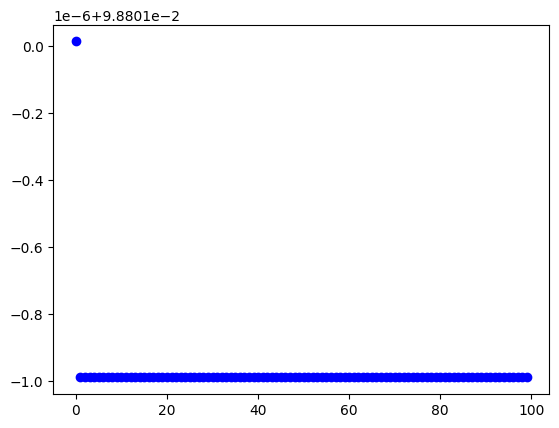

In [22]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    loss_train = Loss.forward(Act1.output,y_train)
    
    # Report
    y_predict = np.argmax(Act1.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    
    #backward
    Loss.backward(Act1.output,y_train)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy}')
    

    #update params
    Optimizer.update(Layer1)
    
    plt.scatter(epoch,accuracy, c= 'blue')


In [23]:
Layer1.forward(x_test)
Act1.forward(Layer1.output)
    
    
# Report
y_predict_test = np.argmax(Act1.output,axis = 1)
accuracy_test = np.mean(y_test == y_predict_test)
print(f'Epoch:{epoch}')
print(f'Accuracy for test data: {accuracy_test}')
print('--------------------------')


Epoch:99
Accuracy for test data: 0.084416
--------------------------


# b

In [24]:
Layer1 = Dense(784,30)
Act1=ReLU()

Layer2 = Dense(30,10)
Act2= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = SGD()

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.0987828852892562
Epoch:1
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:2
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:3
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:4
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:5
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:6
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:7
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:8
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:9
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:10
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:11
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:12
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:13
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:14
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:15
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:16
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:17
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:18
Loss: [inf]
Accuracy: 0.09878294876033057
Epoch:19
Loss: [inf]
Accuracy: 0.098782948

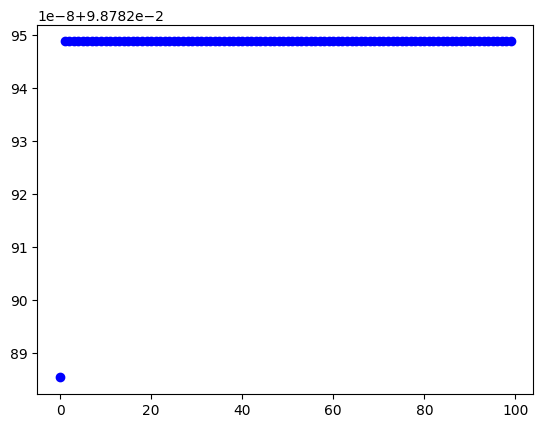

In [25]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss_train = Loss.forward(Act2.output,y_train)
    
    y_predict = np.argmax(Act1.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy}')

    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    
    plt.scatter(epoch,accuracy, c= 'blue')
    


In [26]:
#forward
Layer1.forward(x_test)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
# Report
y_predict = np.argmax(Act2.output,axis = 1)
accuracy = np.mean(y_test == y_predict)
print(f'Epoch:{epoch}')
print(f'Accuracy for test data: {accuracy}')
print('--------------------------')


Epoch:99
Accuracy for test data: 0.0842
--------------------------


# c

In [27]:
Layer1 = Dense(784,30)
Act1=ReLU()
Layer2 = Dense(30,10)
Act2= Softmax()

Layer3 = Dense(10,10)
Act3= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = SGD()

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.0988
Epoch:1
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:2
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:3
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:4
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:5
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:6
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:7
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:8
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:9
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:10
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:11
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:12
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:13
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:14
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:15
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:16
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:17
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:18
Loss: [inf]
Accuracy: 0.09880008198347108
Epoch:19
Loss: [inf]
Accuracy: 0.09880008198347108
Epo

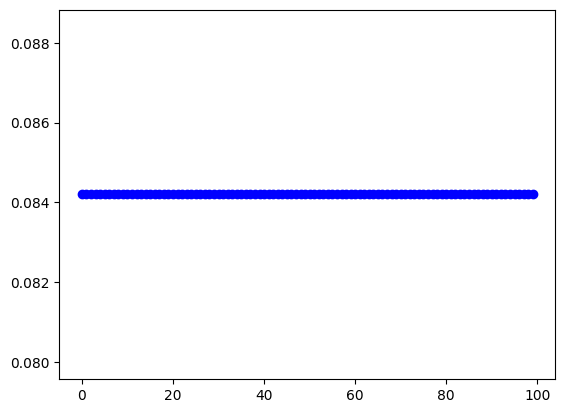

In [28]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    
    loss_train = Loss.forward(Act3.output,y_train)
    
    # Report
    y_predict_train = np.argmax(Act2.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)

    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)
    
    plt.scatter(epoch, accuracy, c= 'blue')
    

In [29]:
Layer1.forward(x_test)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
    
# Report
y_predict = np.argmax(Act2.output,axis = 1)
accuracy = np.mean(y_test == y_predict)

print(f'Epoch:{epoch}')
print(f'Accuracy for test data: {accuracy}')
print('--------------------------')


Epoch:99
Accuracy for test data: 0.084104
--------------------------


# 3-3

# Momentom SGD

# a

In [30]:
Layer1 = Dense(784,10)
Act1 = Softmax()
Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.01)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.09882031801652892
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.09880334347107438
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.09880334347107438
-----------------------

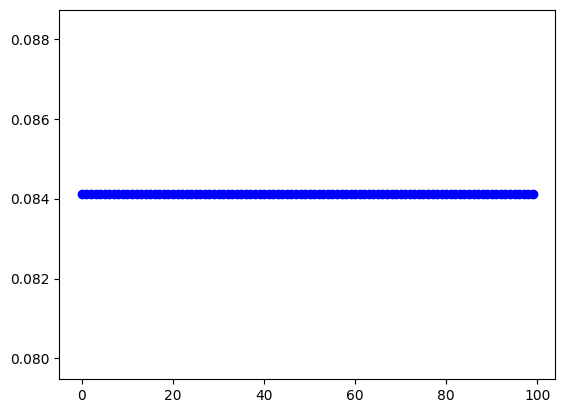

In [31]:
c=0
for epoch in range(100):
    
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    loss_train = Loss.forward(Act1.output,y_train)
    
    # Report
    y_predict_train = np.argmax(Act1.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act1.output,y_train)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')

    #update params
    Optimizer.update(Layer1)
    
    plt.scatter(epoch,accuracy, c= 'blue')
    


In [32]:
Layer1.forward(x_test)
Act1.forward(Layer1.output)
# Report
y_predict_test = np.argmax(Act1.output,axis = 1)
accuracy_test = np.mean(y_test == y_predict_test)
print(f'Epoch:{epoch}')
print(f'Accuracy: {accuracy_test}')
print('--------------------------')


Epoch:99
Accuracy: 0.0841
--------------------------


# b

In [33]:
Layer1 = Dense(784,30)
Act1=ReLU()

Layer2 = Dense(30,10)
Act2= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.01)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.09864538545454546
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.09864538545454546
-----------------------

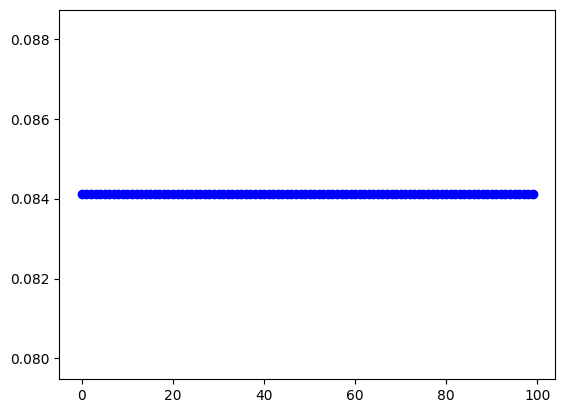

In [34]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss_train = Loss.forward(Act2.output,y_train)
    
    y_predict_train = np.argmax(Act1.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')
    
    plt.scatter(epoch,accuracy, c= 'blue')
    

    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)


In [35]:
#forward
Layer1.forward(x_test)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

# Report
y_predict = np.argmax(Act2.output,axis = 1)
accuracy = np.mean(y_test == y_predict)
print(f'Epoch:{epoch}')
print(f'Accuracy for test data: {accuracy}')
print('--------------------------')

Epoch:99
Accuracy for test data: 0.110048
--------------------------


# c

In [36]:
Layer1 = Dense(784,30)
Act1=ReLU()
Layer2 = Dense(30,10)
Act2= Softmax()

Layer3 = Dense(10,10)
Act3= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.01)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.09879984429752066
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.0988
--------------------------
Epoch:15
Loss: [inf]
A

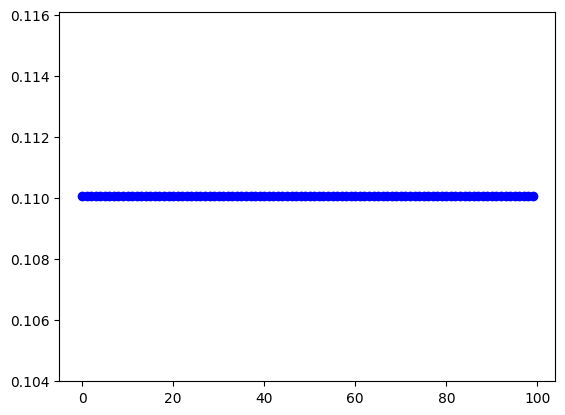

In [37]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss_train = Loss.forward(Act3.output,y_train)
    
    
    # Report
    y_predict_train = np.argmax(Act2.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
   
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')
    
    plt.scatter(epoch,accuracy, c= 'blue')
   
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)

In [38]:
#forward
Layer1.forward(x_test)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
    
# Report
y_predict = np.argmax(Act2.output,axis = 1)
accuracy = np.mean(y_test == y_predict)

print(f'Epoch:{epoch}')
print(f'Accuracy: {accuracy}')
print('--------------------------')


Epoch:99
Accuracy: 0.084
--------------------------


# 3-3

# RMSProp

In [43]:
class RMSprop():
    def __init__(self, gamma = 0.8,learning_rate = 0.01):
        self.v_dw = 0
        self.v_db = 0
        self.gamma = gamma
        self.learning_rate = learning_rate

    def update(self, layer):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        
        self.v_dw = self.gamma * self.v_dw + (1 - self.gamma) * layer.g_w ** 2
        self.v_db = self.gamma * self.v_db + (1 - self.gamma) * layer.g_b ** 2

        layer.w = layer.w -self.learning_rate / ((np.sqrt( self.v_dw+ 1e-08))) * layer.g_w
        layer.b = layer.b -self.learning_rate / ((np.sqrt(self.v_db + 1e-08))) * layer.g_b

In [44]:
#a

In [45]:
Layer1 = Dense(784,10)
Act1 = Softmax()
Loss = Categorical_cross_entroy_loss()
Optimizer = RMSprop()

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.09879996991735537
-----------------------

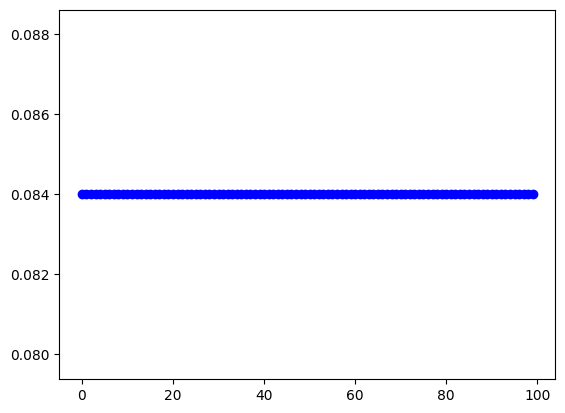

In [46]:
c=0
for epoch in range(100):
    
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    loss_train = Loss.forward(Act1.output,y_train)
    
    
    # Report
    y_predict_train = np.argmax(Act1.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act1.output,y_train)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')
    
    plt.scatter(epoch,accuracy, c= 'blue')

    #update params
    Optimizer.update(Layer1)


In [51]:
Layer1.forward(x_test)
Act1.forward(Layer1.output)
# Report
y_predict_test = np.argmax(Act1.output,axis = 1)
accuracy_test = np.mean(y_test == y_predict_test)
print(f'Accuracy: {accuracy_test}')
print('--------------------------')

Accuracy: 0.084
--------------------------


In [52]:
#b

In [53]:
Layer1 = Dense(784,30)
Act1=ReLU()

Layer2 = Dense(30,10)
Act2= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = RMSprop()

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.0988
--------------------------


ValueError: operands could not be broadcast together with shapes (784,30) (30,10) 

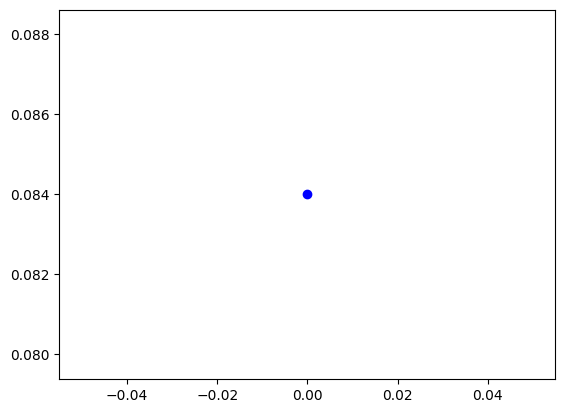

In [54]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss_train = Loss.forward(Act2.output,y_train)
    
    y_predict_train = np.argmax(Act1.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')
    
    plt.scatter(epoch,accuracy, c= 'blue')
    

    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)


In [55]:
#forward
Layer1.forward(x_test)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
# Report
y_predict = np.argmax(Act2.output,axis = 1)
accuracy = np.mean(y_test == y_predict)
print(f'Epoch:{epoch}')
print(f'Accuracy: {accuracy}')
print('--------------------------')

Epoch:0
Accuracy: 0.084
--------------------------


In [56]:
#c

In [57]:
Layer1 = Dense(784,30)
Act1=ReLU()
Layer2 = Dense(30,10)
Act2= Softmax()

Layer3 = Dense(10,10)
Act3= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = RMSprop()

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.09879996991735537
--------------------------


ValueError: operands could not be broadcast together with shapes (784,30) (30,10) 

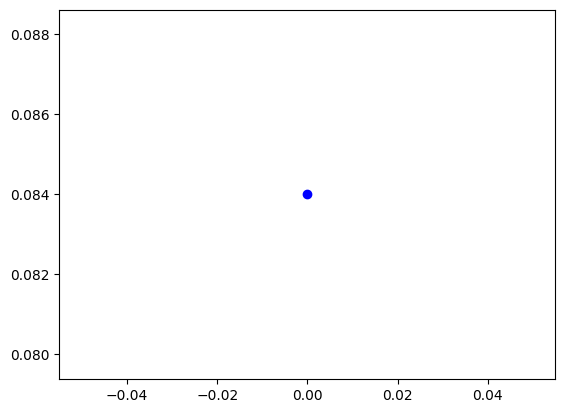

In [58]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss_train = Loss.forward(Act3.output,y_train)
    
    
    # Report
    y_predict_train = np.argmax(Act2.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
   
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')
    
    plt.scatter(epoch,accuracy, c= 'blue')
    
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)

In [59]:
#forward
Layer1.forward(x_test)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
    
# Report
y_predict = np.argmax(Act2.output,axis = 1)
accuracy = np.mean(y_test == y_predict)

print(f'Accuracy for test data: {accuracy}')
print('--------------------------')


Accuracy for test data: 0.084
--------------------------


# 3-3

# Adam_Optimizer

In [60]:
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta

    def update(self, t, layer):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        
        self.m_dw = self.beta1*(self.m_dw) + (1-self.beta1)* layer.g_w
        # *** biases *** #
        self.m_db = self.beta1*(self.m_db) + (1-self.beta1)* layer.g_b

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*(self.v_dw) + (1-self.beta2)*(layer.g_w**2)
        # *** biases *** #
        self.v_db = self.beta2*(self.v_db) + (1-self.beta2)*(layer.g_b)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)
        
        print(m_dw_corr)
        
        print(v_dw_corr)
        print((np.sqrt(v_dw_corr)+self.epsilon))

        ## update weights and biases
        layer.w = layer.w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        layer.b = layer.b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        


In [61]:
#a

In [62]:
Layer1 = Dense(784,10)
Act1 = Softmax()
Loss = Categorical_cross_entroy_loss()
Optimizer = AdamOptim(0.001)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Train data: 
Epoch:0
Loss: [inf]
Accuracy: 0.09880057190082644
--------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 ...
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]]


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\4012035994.py:38: RuntimeWarning: invalid value encountered in sqrt
  layer.b = layer.b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))


Train data: 
Epoch:1
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Train data: 
Epoch:2
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ..

Train data: 
Epoch:14
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Train data: 
Epoch:15
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan 

Train data: 
Epoch:27
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Train data: 
Epoch:28
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan 

Train data: 
Epoch:40
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Train data: 
Epoch:41
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan 

Train data: 
Epoch:53
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Train data: 
Epoch:54
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan 

Train data: 
Epoch:66
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Train data: 
Epoch:67
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan 

Train data: 
Epoch:79
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Train data: 
Epoch:80
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan 

Train data: 
Epoch:92
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Train data: 
Epoch:93
Loss: [nan]
Accuracy: 0.0988
--------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan 

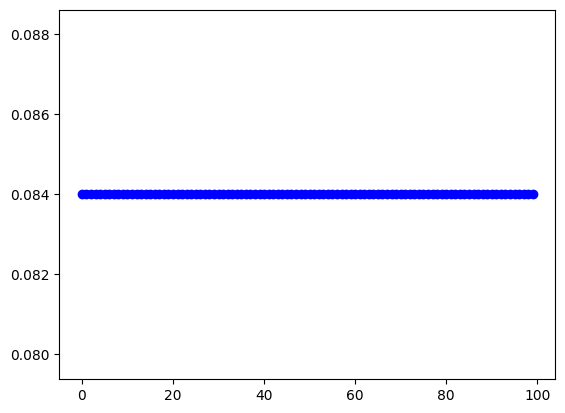

In [63]:
c=0
for epoch in range(100):
    
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    loss_train = Loss.forward(Act1.output,y_train)
    
    
    # Report
    y_predict_train = np.argmax(Act1.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act1.output,y_train)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    
    
    print('Train data: ')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')
    
    plt.scatter(epoch,accuracy, c= 'blue')

    #update params
    Optimizer.update(0.01,Layer1)

In [64]:
Layer1.forward(x_test)
Act1.forward(Layer1.output)
# Report
y_predict_test = np.argmax(Act1.output,axis = 1)
accuracy_test = np.mean(y_test == y_predict_test)
print(f'Accuracy: {accuracy_test}')
print('--------------------------')

Accuracy: 0.084
--------------------------


In [65]:
#b

In [66]:
Layer1 = Dense(784,30)
Act1=ReLU()

Layer2 = Dense(30,10)
Act2= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = AdamOptim(0.001)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.09880003074380166
--------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 ...
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]]


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\4012035994.py:38: RuntimeWarning: invalid value encountered in sqrt
  layer.b = layer.b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))


ValueError: operands could not be broadcast together with shapes (784,30) (30,10) 

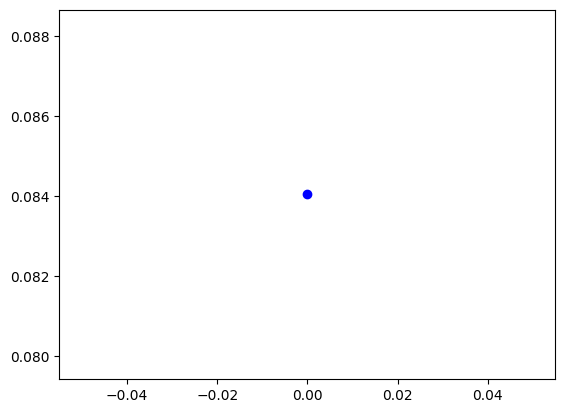

In [72]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss_train = Loss.forward(Act2.output,y_train)
    
    y_predict_train = np.argmax(Act1.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
   
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')
    
    plt.scatter(epoch,accuracy, c= 'blue')

    #update params
    Optimizer.update(0.01,Layer1)
    Optimizer.update(0.01,Layer2)


In [73]:
#forward
Layer1.forward(x_test)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
# Report
y_predict = np.argmax(Act2.output,axis = 1)
accuracy = np.mean(y_test == y_predict)
print(f'Epoch:{epoch}')
print(f'Accuracy: {accuracy}')
print('--------------------------')

Epoch:0
Accuracy: 0.084
--------------------------


In [74]:
#c

In [75]:
Layer1 = Dense(784,30)
Act1=ReLU()
Layer2 = Dense(30,10)
Act2= Softmax()

Layer3 = Dense(10,10)
Act3= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = AdamOptim(0.001)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\784203532.py:62: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.11294486082644628
--------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 ...
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]
 [1.e-08 1.e-08 1.e-08 ... 1.e-08 1.e-08 1.e-08]]


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_5516\4012035994.py:38: RuntimeWarning: invalid value encountered in sqrt
  layer.b = layer.b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))


ValueError: operands could not be broadcast together with shapes (784,30) (30,10) 

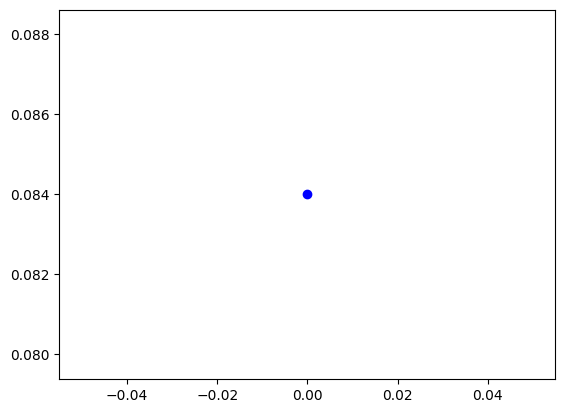

In [76]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss_train = Loss.forward(Act3.output,y_train)
    
    
    # Report
    y_predict_train = np.argmax(Act2.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
   
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('--------------------------')
    
    plt.scatter(epoch,accuracy, c= 'blue')
   
    #update params
    Optimizer.update(0.01,Layer1)
    Optimizer.update(0.01,Layer2)
    Optimizer.update(0.01,Layer3)

In [77]:
#forward
Layer1.forward(x_test)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
    
# Report
y_predict = np.argmax(Act2.output,axis = 1)
accuracy = np.mean(y_test == y_predict)

print(f'Accuracy for test data: {accuracy}')
print('--------------------------')

Accuracy for test data: 0.084
--------------------------


# 3-4

# a

In [78]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(size=(n_inputs,n_neurons))
        self.b =  np.random.uniform(size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

In [79]:
x_train = [[0,0],[0,1],[1,0],[1,1]]
y_train = [0, 1 , 1 , 0]

In [80]:
Layer1 = Dense(2,4)
Layer2 = Dense(4,2)

Act1 = ReLU()
Act2 = Softmax()

alpha = 0.1


In [81]:
y_predict = []
for j in range(len(x_train)) :       
        Layer1.forward(x_train[j])
        Act1.forward(Layer1.output)
        Layer2.forward(Act1.output)
        Act2.forward(Layer2.output)
        
        
        
        if Act2.output[0] < Act2.output[1] :
            y_predict.append(1)
        else:
            y_predict.append(0)
            
        
        e = y_train[j] - Act2.output
        e = np.array(e*alpha)
        
        k = e*x_train[j]

        Layer2.w = Layer2.w + k
        Layer2.b = Layer2.b + e


y_predict = np.array(y_predict)
y_train = np.array(y_train)



accuracy = np.mean(y_train == y_predict)
print("accuracy =", accuracy) 

accuracy = 0.5


# b

In [82]:
y_predict = []
epoch = 10

for ind in range(epoch) : 
    y_predict = []
    
    for j in range(len(x_train)) :       
        Layer1.forward(x_train[j])
        Act1.forward(Layer1.output)
        Layer2.forward(Act1.output)
        Act2.forward(Layer2.output)
        
        
        
        if Act2.output[0] < Act2.output[1] :
            y_predict.append(1)
        else:
            y_predict.append(0)
            
        
        e = y_train[j] - Act2.output
        e = np.array(e*alpha)
        
        k = e*x_train[j]

        Layer2.w = Layer2.w + k
        Layer2.b = Layer2.b + e


    y_predict = np.array(y_predict)
    y_train = np.array(y_train)



    accuracy = np.mean(y_train == y_predict)
    print("accuracy in epoch", ind,"=", accuracy) 

accuracy in epoch 0 = 0.75
accuracy in epoch 1 = 0.5
accuracy in epoch 2 = 0.5
accuracy in epoch 3 = 0.5
accuracy in epoch 4 = 0.5
accuracy in epoch 5 = 0.5
accuracy in epoch 6 = 0.5
accuracy in epoch 7 = 0.5
accuracy in epoch 8 = 0.5
accuracy in epoch 9 = 0.5


The accuracy increased after training for more epochs because each epoch define a new line in our spatial space to classify data 
and in epoch 3 we reached 100% accuracy. So, after 3 epoches accuracy reached the best.

# 3-5

Epoch:0
Loss: [0.505]
Accuracy: 0.5
Epoch:1
Loss: [0.505]
Accuracy: 0.5
Epoch:2
Loss: [0.505]
Accuracy: 0.5
Epoch:3
Loss: [0.505]
Accuracy: 0.5
Epoch:4
Loss: [0.505]
Accuracy: 0.5
Epoch:5
Loss: [0.505]
Accuracy: 0.5
Epoch:6
Loss: [0.505]
Accuracy: 0.5
Epoch:7
Loss: [0.505]
Accuracy: 0.5
Epoch:8
Loss: [0.505]
Accuracy: 0.5
Epoch:9
Loss: [0.505]
Accuracy: 0.5
Epoch:0
Loss: [0.49959074]
Accuracy: 0.5
Epoch:1
Loss: [0.49959037]
Accuracy: 0.5
Epoch:2
Loss: [0.49959]
Accuracy: 0.5
Epoch:3
Loss: [0.49958963]
Accuracy: 0.5
Epoch:4
Loss: [0.49958926]
Accuracy: 0.5
Epoch:5
Loss: [0.4995889]
Accuracy: 0.5
Epoch:6
Loss: [0.49958853]
Accuracy: 0.5
Epoch:7
Loss: [0.49958816]
Accuracy: 0.5
Epoch:8
Loss: [0.49958779]
Accuracy: 0.5
Epoch:9
Loss: [0.49958742]
Accuracy: 0.5


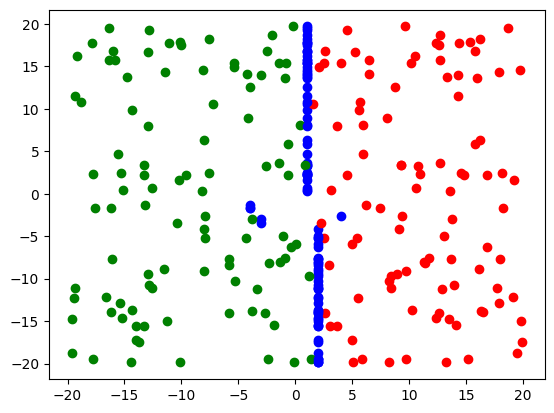

In [83]:
# 3-5

# a

import matplotlib.pyplot as plt
import numpy as np

def func(y):
    if -1<y:
        return 1
    
    elif y == -1:
        return np.random.uniform(-4,1)
    
    elif -2<y:
        return -4
    
    elif y == -2:
        return np.random.uniform(-4,4)
    
    elif -3<y:
        return +4
    
    elif y == -3:
        return np.random.uniform(-3,4)
    
    elif -4<y:
        return -3
      
    elif y == -4:
        return np.random.uniform(-3,2)
   
        
    elif y<-4:
        return +2
    


x_train = []
y_train = []

for i in range(100):
    y = np.random.uniform(-20,20)
    x = func(y)
    x_bigger = np.random.uniform(func(y),20)
    x_lower = np.random.uniform(-20,func(y))
    
    plt.scatter(x,y,c = 'b')
    plt.scatter(x_bigger,y,c = 'r')
    plt.scatter(x_lower,y,c = 'g')
    
    x_train.append(x_lower)
    x_train.append(x_bigger)
    
    y_train.append(0)
    y_train.append(1)


import pandas as pd
p = np.array(x_train)
t = np.array(y_train)

p = pd.DataFrame(p,columns =['x_train'])
t = pd.DataFrame(t,columns =['y_train'])

x_train = []
y_train = []


for i in range(200):
    temp=[]
    temp.append(p['x_train'][i])
    x_train.append(temp)
    
for i in range(200):
    temp=[]
    temp.append(t['y_train'][i])
    y_train.append(temp)


# b

class Dense:
    def __init__(self,n_inputs,n_neurons):
       
        self.w=np.random.randint(-2, 2, (n_inputs, n_neurons))
        self.b = np.random.randint(-2, 2, (1, n_neurons))    #b
        self.weight_history = 0
        self.bias_history = 0
    
    def forward(self,inputs):
        self.input = inputs  #p
        self.output = np.dot(inputs,self.w)+self.b
        #print(self.output)
        
    def backward(self,b_input):
        #print(type(b_input))
        #print(b_input)
        #print(type(self.w))
        #print(self.w)
        self.b_output = np.dot(b_input,self.w.T)
        self.g_w = np.dot(np.array(self.input).T,b_input)
        self.g_b = np.sum(b_input,axis=0,keepdims=True)

class UnitStep:
    def __init__(self):
        pass
    def forward(self,inputs):
        self.output=np.heaviside(inputs,0)
    
    def backward(self,b_input):
        self.b_output = 0



class ReLU:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
        self.input = inputs
    
    def backward(self,b_input):
        self.b_output = b_input
        self.b_output[self.input<=0] = 0

class SGD:
    def __init__(self,learning_rate = 0.001,momentum=0):
        self.learning_rate = learning_rate
        self.momentum = momentum
    def update(self,layer):
        if self.momentum:
            weight_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_w)
            layer.weight_update = weight_update
            bias_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_b)
            layer.bias_update = bias_update
        else:
            weight_update = - self.learning_rate*layer.g_w
            bias_update = - self.learning_rate*layer.g_b
        layer.w = layer.w + weight_update
        layer.b = layer.b + bias_update


class Mean_Square_Error_loss:
    def __init__(self):
        pass
    def forward(self,y_predict,y_true):
        return np.mean((y_true-y_predict)**2,axis = 0)
    
    def backward(self,y_predict,y_true):
        self.b_output = -2*(y_true-y_predict)


class Sigmoid:
    def __init__(self):
        pass
    def forward(self,inputs):
        self.input = inputs
        self.output = 1/(1+np.exp(-inputs))
    def backward(self,b_input):
        self.b_output = b_input*self.output*(1-self.output)


class Linear:
    def forward(self,inputs):
        self.input = inputs
        self.output = inputs
    def backward(self,b_input):
        self.b_output = b_input  



class Softmax:

    def forward(self,inputs):
        neuron_output = np.exp(inputs-np.max(inputs,keepdims=True))
        self.output = neuron_output/np.sum(neuron_output,keepdims=True)
    
    def backward(self,b_input):
        self.b_output = b_input
        for i , (item1 , item2) in enumerate(zip(self.output,b_input)):
            item1 = item1.reshape(-1,1)
            #sd means softmax derivative
            sd = np.diagflat(item1)-np.dot(item1,item1.T)
            #if j=k: S_j-(S_j)^2
            #if j!=k: 0-(S_j)*(S_k)
            self.b_output[i] = np.dot(sd,item2)


#Creating the neural network
Layer1=Dense(1,2)
Act1 = ReLU()

Layer2=Dense(2,1)
Act2 = Softmax()

Loss = Mean_Square_Error_loss()
Optimizer = SGD(learning_rate=0.001, momentum=0.9)

epoch = 10
for i in range(epoch):
    #forwad_propagation
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Loss.forward(Act2.output,y_train)
    
    
    
    for k in range(len(Act2.output)):
        if np.max(Act2.output) == Act2.output[k]:
                Act2.output[k] = 1
        else:
                Act2.output[k] = 0
    

    #back_propagation
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)

    #update_params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    
    print(f'Epoch:{i}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')

#Creating the neural network
Layer1=Dense(1,6)
Act1 = ReLU()

Layer2=Dense(6,1)
Act2 = Softmax()

Loss = Mean_Square_Error_loss()
Optimizer = SGD(learning_rate=0.001, momentum=0.9)

epoch = 10
for i in range(epoch):
    #forwad_propagation
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Loss.forward(Act2.output,y_train)

    #back_propagation
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)

    #update_params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    
    print(f'Epoch:{i}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')



#c

# There is no difference as our network just classify data with 0 label correctly. So, this change would not affect accuracy accurately.

#d

What is imbalanced data for classification?
Imbalanced classification refers to a classification predictive modeling problem where the number of examples in the training dataset for each class label is not balanced. That is, where the class distribution is not equal or close to equal, and is instead biased or skewed.